In [2]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd

df = pd.read_csv("data/mtcars.csv")

In [4]:
# 상위 5개 Row 출력
df.head()

,Unnamed: 0,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [5]:
# 하위 5개 Row 출력
df.tail()

,Unnamed: 0,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
27,Lotus Europa,30.4,4,95.1,113,3.77,1.513,16.9,1,1,5,2
28,Ford Pantera L,15.8,8,351.0,264,4.22,3.170,14.5,0,1,5,4
29,Ferrari Dino,19.7,6,145.0,175,3.62,2.770,15.5,0,1,5,6
30,Maserati Bora,15.0,8,301.0,335,3.54,3.570,14.6,0,1,5,8
31,Volvo 142E,21.4,4,121.0,109,4.11,2.780,18.6,1,1,4,2


In [6]:
# Row 개수 출력
df.shape[0]

32

In [7]:
# 컬럼 이름이 없는 컬럼 조회
unnamed_cols = [col for col in df.columns if 'Unnamed' in str(col)]
print(unnamed_cols)

['Unnamed: 0']


In [8]:
# 컬럼 이름이 없는 값 이름 삽입
df = df.rename(columns={'Unnamed: 0': 'model'})

In [9]:
# index dtypes, columns 등 Dataframe 정보 출력
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   model   32 non-null     object 
 1   mpg     32 non-null     float64
 2   cyl     32 non-null     int64  
 3   disp    32 non-null     float64
 4   hp      32 non-null     int64  
 5   drat    32 non-null     float64
 6   wt      32 non-null     float64
 7   qsec    32 non-null     float64
 8   vs      32 non-null     int64  
 9   am      32 non-null     int64  
 10  gear    32 non-null     int64  
 11  carb    32 non-null     int64  
dtypes: float64(5), int64(6), object(1)
memory usage: 3.1+ KB


In [10]:
# 각 컬럼의 통계 정보 조회 (평균, 표준편차, 최대/최소 등)
df.describe()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
count,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.0000
mean,20.090625,6.187500,230.721875,146.687500,3.596563,3.217250,17.848750,0.437500,0.406250,3.687500,2.8125
std,6.026948,1.785922,123.938694,68.562868,0.534679,0.978457,1.786943,0.504016,0.498991,0.737804,1.6152
min,10.400000,4.000000,71.100000,52.000000,2.760000,1.513000,14.500000,0.000000,0.000000,3.000000,1.0000
25%,15.425000,4.000000,120.825000,96.500000,3.080000,2.581250,16.892500,0.000000,0.000000,3.000000,2.0000
50%,19.200000,6.000000,196.300000,123.000000,3.695000,3.325000,17.710000,0.000000,0.000000,4.000000,2.0000
75%,22.800000,8.000000,326.000000,180.000000,3.920000,3.610000,18.900000,1.000000,1.000000,4.000000,4.0000
max,33.900000,8.000000,472.000000,335.000000,4.930000,5.424000,22.900000,1.000000,1.000000,5.000000,8.0000


In [11]:
# Gear의 값 개수 출력
df['gear'].nunique()

3

In [12]:
# Transmission 값 개수 출력
df['am'].nunique()

2

In [16]:
# Gear와 Transmission 조합 및 조합 별 차량 개수

# 방법 1: crosstab을 사용한 방법
gear_am_ct = pd.crosstab(df['gear'], df['am'])
gear_am_ct

am,0,1
gear,,
3,15,0
4,4,8
5,0,5


In [17]:
# Gear와 Transmission 조합 및 조합 별 차량 개수

# 방법 2: crosstab을 사용하지 않는 방법 - groupby 사용
gear_am_comb = df.groupby(['gear', 'am']).size().reset_index(name='count')
gear_am_comb

,gear,am,count
0,3,0,15
1,4,0,4
2,4,1,8
3,5,1,5


In [18]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


<Axes: title={'center': '# of Cars by Gear x Transmission'}, xlabel='(Gear, Auto Transmission)', ylabel='# of Cars'>

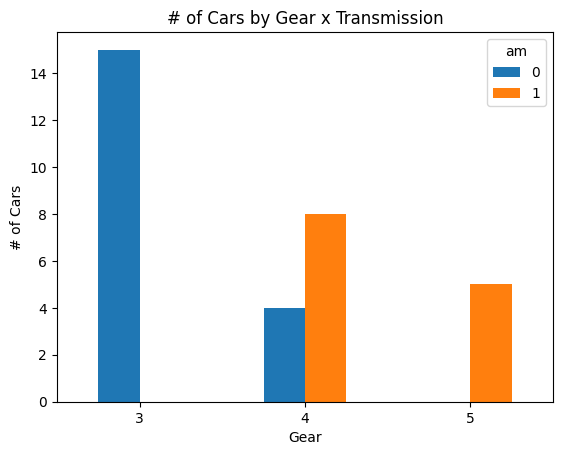

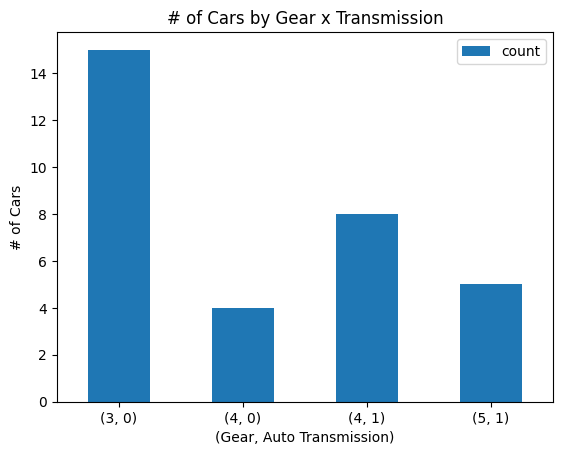

In [19]:
# Gear와 Transmission 조합 및 조합 별 차량 개수를 Bar 그래프로 출력

# 방법 1: crosstab을 사용한 방법
gear_am_ct.plot(
    kind='bar',
    title='# of Cars by Gear x Transmission',
    xlabel='Gear',
    ylabel='# of Cars',
    rot=0
)

# 방법 2: crosstab을 사용하지 않는 방법
gear_am_comb.set_index(['gear', 'am']).plot(
    kind='bar',
    title='# of Cars by Gear x Transmission',
    xlabel='(Gear, Auto Transmission)',
    ylabel='# of Cars',
    rot=0,
)

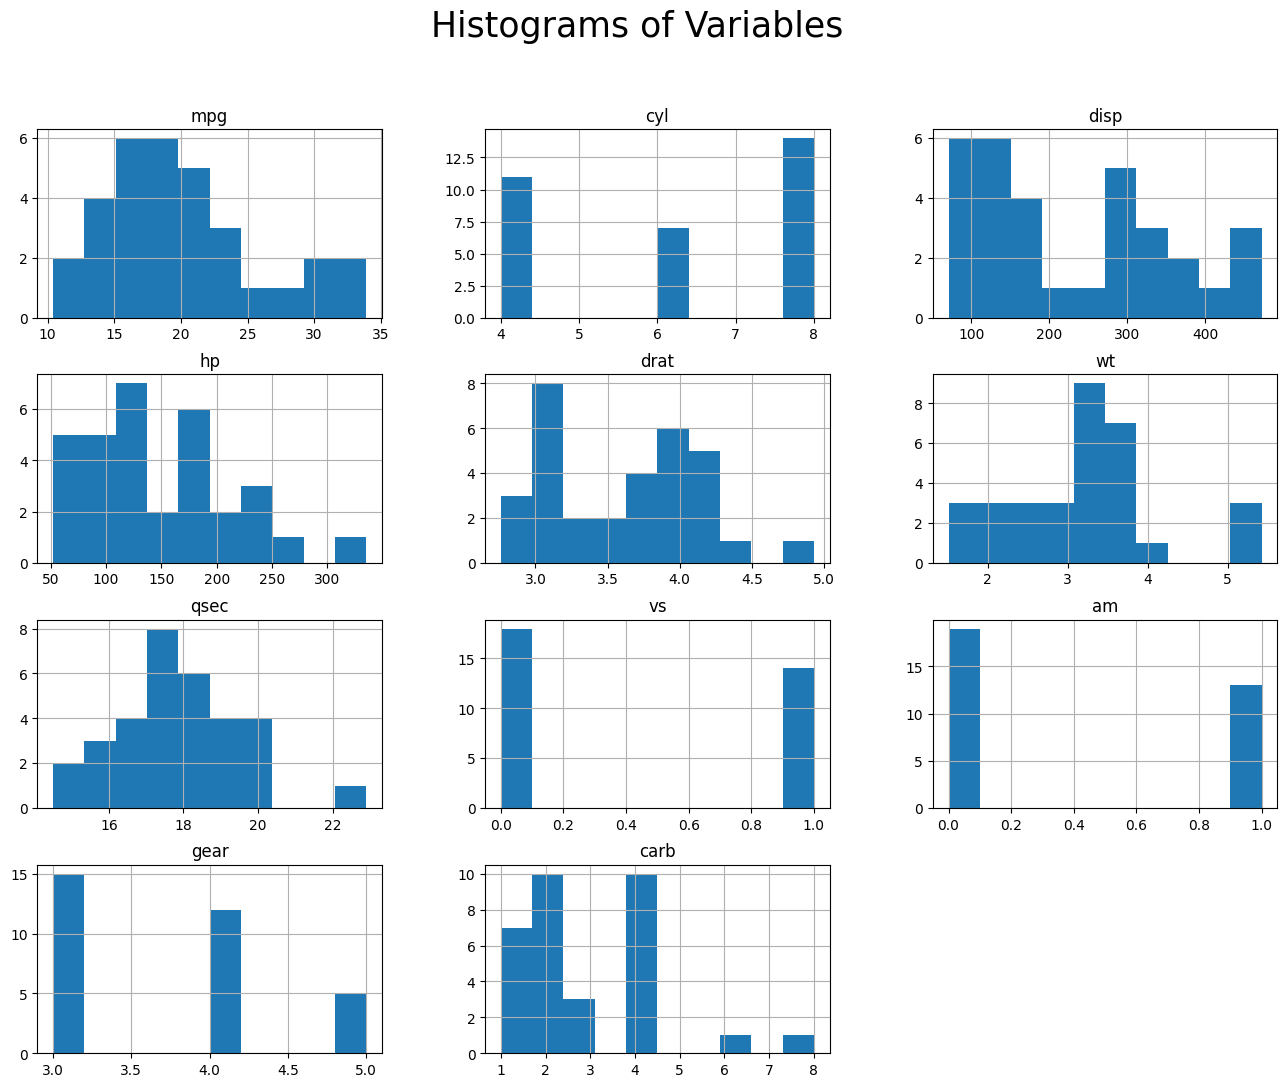

In [20]:
import matplotlib.pyplot as plt

# 1. 히스토그램 그리기
df.hist(figsize=(16, 12))

# 2. 전체 제목 설정
plt.suptitle('Histograms of Variables', fontsize=25) 

plt.show()

<Axes: title={'center': 'Cylinder vs Horse Power'}, xlabel='cyl', ylabel='hp'>

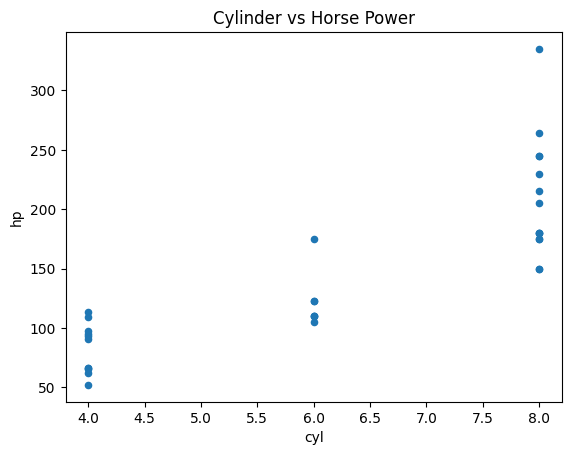

In [21]:
# Cylinder와 HorsePower 간의 Scatter 차트
df.plot.scatter(x='cyl', y='hp', title='Cylinder vs Horse Power')

<Axes: title={'center': 'MPG vs Horse Power'}, xlabel='mpg', ylabel='hp'>

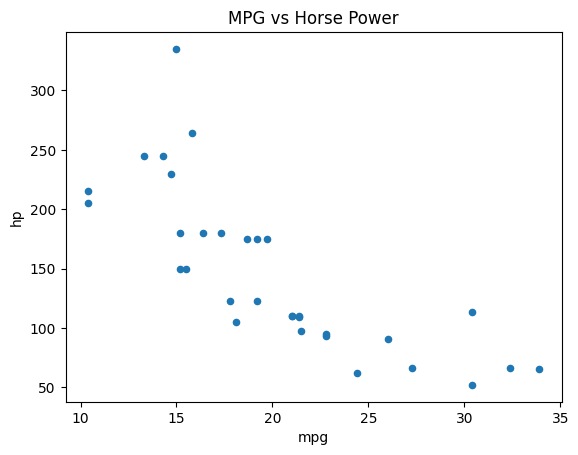

In [22]:
# MPG와 HorsePower간의 Scatter 차트
df.plot.scatter(x='mpg', y='hp', title='MPG vs Horse Power')

In [24]:
# 각 변수들 간의 상관계수 표
df.corr(numeric_only=True)

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
mpg,1.000000,-0.852162,-0.847551,-0.776168,0.681172,-0.867659,0.418684,0.664039,0.599832,0.480285,-0.550925
cyl,-0.852162,1.000000,0.902033,0.832447,-0.699938,0.782496,-0.591242,-0.810812,-0.522607,-0.492687,0.526988
disp,-0.847551,0.902033,1.000000,0.790949,-0.710214,0.887980,-0.433698,-0.710416,-0.591227,-0.555569,0.394977
hp,-0.776168,0.832447,0.790949,1.000000,-0.448759,0.658748,-0.708223,-0.723097,-0.243204,-0.125704,0.749812
drat,0.681172,-0.699938,-0.710214,-0.448759,1.000000,-0.712441,0.091205,0.440278,0.712711,0.699610,-0.090790
wt,-0.867659,0.782496,0.887980,0.658748,-0.712441,1.000000,-0.174716,-0.554916,-0.692495,-0.583287,0.427606
qsec,0.418684,-0.591242,-0.433698,-0.708223,0.091205,-0.174716,1.000000,0.744535,-0.229861,-0.212682,-0.656249
vs,0.664039,-0.810812,-0.710416,-0.723097,0.440278,-0.554916,0.744535,1.000000,0.168345,0.206023,-0.569607
am,0.599832,-0.522607,-0.591227,-0.243204,0.712711,-0.692495,-0.229861,0.168345,1.000000,0.794059,0.057534
gear,0.480285,-0.492687,-0.555569,-0.125704,0.699610,-0.583287,-0.212682,0.206023,0.794059,1.000000,0.274073


In [26]:
df

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2
5,Valiant,18.1,6,225.0,105,2.76,3.460,20.22,1,0,3,1
6,Duster 360,14.3,8,360.0,245,3.21,3.570,15.84,0,0,3,4
7,Merc 240D,24.4,4,146.7,62,3.69,3.190,20.00,1,0,4,2
8,Merc 230,22.8,4,140.8,95,3.92,3.150,22.90,1,0,4,2
9,Merc 280,19.2,6,167.6,123,3.92,3.440,18.30,1,0,4,4


# 변수들 간의 상관 관계가 높은 조합 2가지

1. 배기량(disp) & 무게(wt) - 양의 상관관계
3. 무게(wt) & 연비(mpg) - 음의 상관관계

배기량이 커질수록 엔진 자체의 무게와 지탱하는 프레임의 강성이 높아져야 하므로 무게가 증가한다.
차량이 무거울수록 관성을 극복하고 가속하는 데 더 많은 에너지가 소모되어 연료 효율이 급격히 떨어진다.

따라서 결과적으로 아래를 도출해낼 수 있다.
> `[A] 배기량 증대 -> [B] 차량 중량 증가 -> [C] 연료 효율 감소`

위 조건을 통해 여러 비즈니스 결정을 도울 수 있다.

1. 기술적 혁신의 지점 파악
만약 비즈니스 목표가 `[C] 연비 개선`이라면, 단순히 `[B] 무게`를 줄이는 것보다 `[A] 배기량`를 줄이면서도 출력(hp)을 유지하는 엔진 다운사이징 기술이 큰 가치를 창출 할 수 있음을 의미한다.
이 데이터 체인을 통해 터보차저 도입이나 하이브리드 시스템 설계의 당위성을 확보할 수 있다.

2. 세금 및 규제 비용 예측
많은 국가에서 자동차세는 `[A] 배기량`을 기준으로, 탄소세는 `[C] 연비`를 기준으로 부과한다.
기업은 이 모델을 통해 `[A] 배기량`을 소폭 상향했을 때 `[C] 연비`로 인해 발생하는 환경 과징금이 얼마인지 시뮬레이션하여 최적의 수익 구조를 설계할 수 있다.

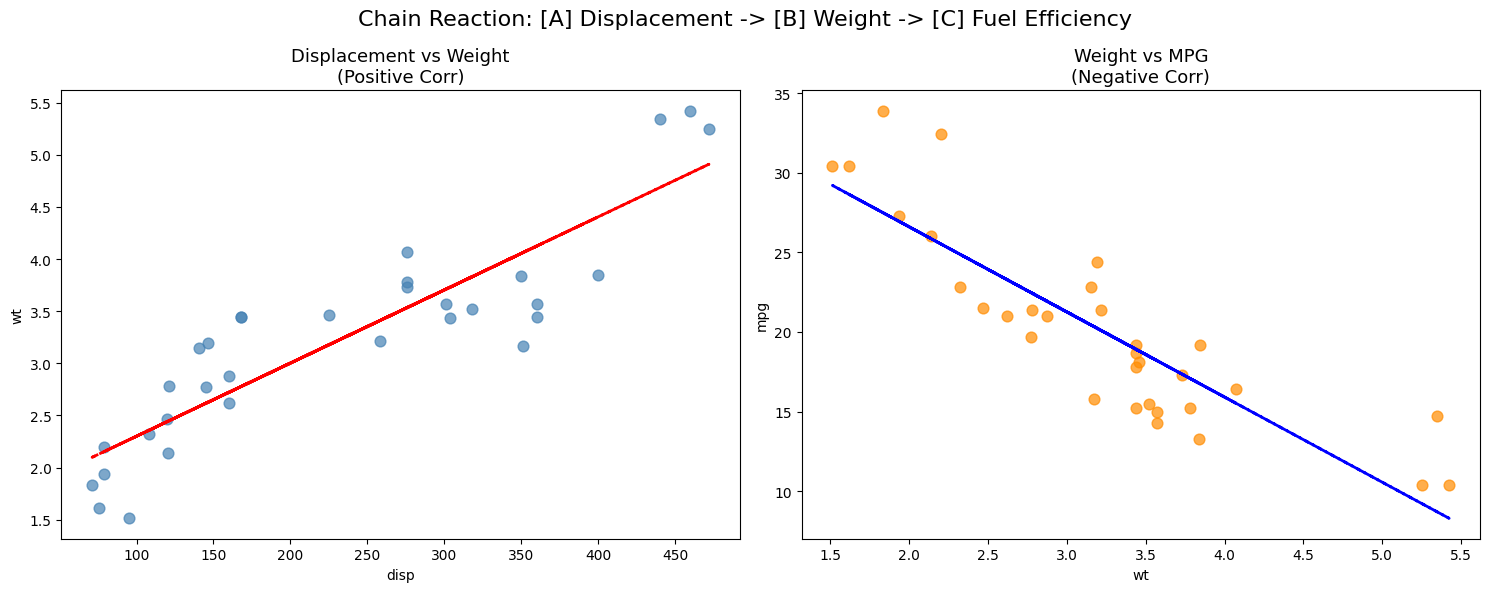

In [30]:
import matplotlib.pyplot as plt

# 1행 2열 프레임 설정
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# 배기량(disp) vs 무게(wt)
x1, y1 = df['disp'], df['wt']

# 기울기(m)와 절편(b) 계산
m1 = ((x1 - x1.mean()) * (y1 - y1.mean())).sum() / ((x1 - x1.mean())**2).sum()
b1 = y1.mean() - m1 * x1.mean()

df.plot.scatter(x='disp', y='wt', ax=axes[0], color='steelblue', s=60, alpha=0.7)
# 추세선 추가
axes[0].plot(x1, m1 * x1 + b1, color='red', linestyle='--', linewidth=2)
axes[0].set_title('Displacement vs Weight\n(Positive Corr)', fontsize=13)

# 무게(wt) vs 연비(mpg)
x2, y2 = df['wt'], df['mpg']
# 기울기(m)와 절편(b) 계산
m2 = ((x2 - x2.mean()) * (y2 - y2.mean())).sum() / ((x2 - x2.mean())**2).sum()
b2 = y2.mean() - m2 * x2.mean()

df.plot.scatter(x='wt', y='mpg', ax=axes[1], color='darkorange', s=60, alpha=0.7)
# 추세선
axes[1].plot(x2, m2 * x2 + b2, color='blue', linestyle='--', linewidth=2)
axes[1].set_title('Weight vs MPG\n(Negative Corr)', fontsize=13)

# 전체 레이아웃 설정
plt.suptitle('Chain Reaction: [A] Displacement -> [B] Weight -> [C] Fuel Efficiency', fontsize=16)
plt.tight_layout()
plt.show()